In [127]:
import numpy as np # library to handle data in a vectorized manner
from tqdm.notebook import tqdm

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import matplotlib.pyplot as plt
#!pip install -U sklearn
from sklearn.cluster import KMeans

#!pip install folium=0.5.0 # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import string

#!pip install lxml
import lxml
print('Libraries imported.')

Libraries imported.


## Importing Data and pre-processing it

In [103]:
df = pd.read_html('https://en.wikipedia.org/wiki/Indian_States_by_most_popular_languages')[0]
df.head()

,State / Union Territory,Language 1,Language 2,Language 3,Language 4,Language 5
0,Andaman & Nicobar Islands,Bengali,Hindi,Tamil,Telugu,Malayalam
1,Andhra Pradesh,Telugu,Urdu,Hindi,Tamil,Marathi
2,Arunachal Pradesh,Nishi,Adi,Bengali,Nepali,Hindi
3,Assam,Assamese,Hindi,Bodo,Nepali,NaN
4,Bihar,Hindi (Bhojpuri and Magahi),Maithili,Urdu,Bengali,Santali


In [104]:
first_lang=[]
for word in df['Language 1']:
    word_list=[i.strip(string.punctuation) for i in word.split()]
    first_lang.append(word_list[0])
print(first_lang)        

['Bengali', 'Telugu', 'Nishi', 'Assamese', 'Hindi', 'Hindi', 'Hindi', 'Hindi', 'Gujarati', 'Hindi', 'Konkani', 'Gujarati', 'Hindi', 'Hindi', 'Kashmiri', 'Hindi', 'Kannada', 'Malayalam', 'Malayalam', 'Hindi', 'Marathi', 'Manipuri', 'Khasi', 'Mizo', 'Naga', 'Odia', 'Tamil', 'Punjabi', 'Hindi', 'Nepali', 'Tamil', 'Telugu', 'Bengali', 'Hindi', 'Hindi', 'Bengali']


In [105]:
df['Language 1']=first_lang
df['Language 5'].fillna("English", inplace = True)
df = df.rename(columns={'State / Union Territory': 'State_UT'})
df.head(10)

,State_UT,Language 1,Language 2,Language 3,Language 4,Language 5
0,Andaman & Nicobar Islands,Bengali,Hindi,Tamil,Telugu,Malayalam
1,Andhra Pradesh,Telugu,Urdu,Hindi,Tamil,Marathi
2,Arunachal Pradesh,Nishi,Adi,Bengali,Nepali,Hindi
3,Assam,Assamese,Hindi,Bodo,Nepali,English
4,Bihar,Hindi,Maithili,Urdu,Bengali,Santali
5,Chandigarh,Hindi,Punjabi,Urdu,Nepali,Bengali
6,Chhattisgarh,Hindi,Odia,Bengali,Telugu,Marathi
7,Dadra & Nagar Haveli,Hindi,Gujarati,Marathi,Konkani,Odia
8,Daman & Diu,Gujarati,Hindi,Marathi,Bengali,Odia
9,Delhi,Hindi,Punjabi,Urdu,Bengali,Maithili


In [107]:
lat=[]
long=[]
for area in tqdm(df['State_UT']):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(area)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate of {} are {}, {}.'.format(area,latitude, longitude))
    lat.append(latitude)
    long.append(longitude)

In [108]:
df['Latitude']=lat
df['Longitude']=long
df

,State_UT,Language 1,Language 2,Language 3,Language 4,Language 5,Latitude,Longitude
0,Andaman & Nicobar Islands,Bengali,Hindi,Tamil,Telugu,Malayalam,10.218834,92.577133
1,Andhra Pradesh,Telugu,Urdu,Hindi,Tamil,Marathi,15.924091,80.186381
2,Arunachal Pradesh,Nishi,Adi,Bengali,Nepali,Hindi,27.689171,96.459723
3,Assam,Assamese,Hindi,Bodo,Nepali,English,26.407384,93.255130
4,Bihar,Hindi,Maithili,Urdu,Bengali,Santali,25.644085,85.906508
5,Chandigarh,Hindi,Punjabi,Urdu,Nepali,Bengali,30.719402,76.764655
6,Chhattisgarh,Hindi,Odia,Bengali,Telugu,Marathi,21.663736,81.840635
7,Dadra & Nagar Haveli,Hindi,Gujarati,Marathi,Konkani,Odia,20.273517,73.004358
8,Daman & Diu,Gujarati,Hindi,Marathi,Bengali,Odia,20.713587,70.922965
9,Delhi,Hindi,Punjabi,Urdu,Bengali,Maithili,28.651718,77.221939


# Preparing data for clustering

<p> In order to perform clustering we need to convert all the categorical data (non-numerical data) into binary. So we will now assign categories for each Language. </p> 
<p>The following steps will be performed: </p>
    <li>Extract all languages present in the dataset
    <li>Perform One hot encoding to transform the data

In [109]:
languages=[]

In [110]:
for l1, l2, l3, l4, l5 in zip(df['Language 1'], df['Language 2'], df['Language 3'], df['Language 4'], df['Language 5']):
    languages.append(l1)
    languages.append(l2)
    languages.append(l3)
    languages.append(l4)
    languages.append(l5)

In [111]:
print('There are {} uniques categories.'.format(len(set(languages))))
languages

There are 33 uniques categories.


['Bengali',
 'Hindi',
 'Tamil',
 'Telugu',
 'Malayalam',
 'Telugu',
 'Urdu',
 'Hindi',
 'Tamil',
 'Marathi',
 'Nishi',
 'Adi',
 'Bengali',
 'Nepali',
 'Hindi',
 'Assamese',
 'Hindi',
 'Bodo',
 'Nepali',
 'English',
 'Hindi',
 'Maithili',
 'Urdu',
 'Bengali',
 'Santali',
 'Hindi',
 'Punjabi',
 'Urdu',
 'Nepali',
 'Bengali',
 'Hindi',
 'Odia',
 'Bengali',
 'Telugu',
 'Marathi',
 'Hindi',
 'Gujarati',
 'Marathi',
 'Konkani',
 'Odia',
 'Gujarati',
 'Hindi',
 'Marathi',
 'Bengali',
 'Odia',
 'Hindi',
 'Punjabi',
 'Urdu',
 'Bengali',
 'Maithili',
 'Konkani',
 'Marathi',
 'Hindi',
 'Kannada',
 'Urdu',
 'Gujarati',
 'Hindi',
 'Sindhi',
 'Marathi',
 'Urdu',
 'Hindi',
 'Punjabi',
 'Urdu',
 'Bengali',
 'Maithili',
 'Hindi',
 'Punjabi',
 'Nepali',
 'Kashmiri',
 'Dogri',
 'Kashmiri',
 'Hindi',
 'Dogri',
 'Punjabi',
 'Urdu',
 'Hindi',
 'Santhali',
 'Bengali',
 'Urdu',
 'Odia',
 'Kannada',
 'Tulu',
 'Telugu',
 'Tamil',
 'Marathi',
 'Malayalam',
 'Tamil',
 'Tulu',
 'Kannada',
 'Konkani',
 'Malayalam',

Now that we have all languages we will convert them into columns for a dataframe and then proceed to perform one hot encoding. But first we need to prepare a dataframe only the states and the languages spoken in that state.

In [112]:
state_list=list()
for i in df['State_UT']:
    state_list.append(i)
state_list*=5
len(state_list)



180

In [113]:
mod_df=pd.DataFrame(columns=['State_UT', 'Languages'])
mod_df['State_UT']=state_list
frames = [df['Language 1'], df['Language 2'],df['Language 3'],df['Language 4'],df['Language 5']]
result=pd.concat(frames)
lang_list=list(result)
lang_list
mod_df['Languages']=lang_list
mod_df

,State_UT,Languages
0,Andaman & Nicobar Islands,Bengali
1,Andhra Pradesh,Telugu
2,Arunachal Pradesh,Nishi
3,Assam,Assamese
4,Bihar,Hindi
5,Chandigarh,Hindi
6,Chhattisgarh,Hindi
7,Dadra & Nagar Haveli,Hindi
8,Daman & Diu,Gujarati
9,Delhi,Hindi


## Some Data Visualization and Analysis

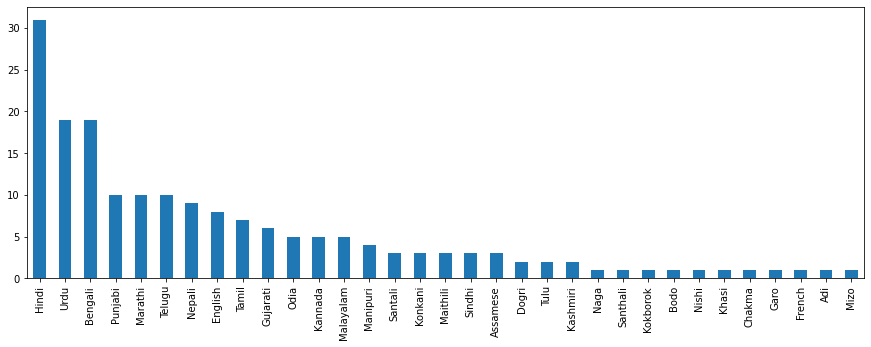

In [132]:
plt.figure(figsize=(15,5))
mod_df['Languages'].value_counts().plot(kind='bar')

As we can clearly see from the above analysis, Hindi is the most popular language spoken followed Urdu and Bengali.

## One Hot Encoding and Clustering

In [114]:
onehot_df=pd.DataFrame()
onehot_df = pd.get_dummies(mod_df['Languages'], prefix="", prefix_sep="")

onehot_df['State_UT']=mod_df['State_UT']

fixed_columns = [onehot_df.columns[-1]] + list(onehot_df.columns[:-1])
onehot_df = onehot_df[fixed_columns]

onehot_df


,State_UT,Adi,Assamese,Bengali,Bodo,Chakma,Dogri,English,French,Garo,Gujarati,Hindi,Kannada,Kashmiri,Khasi,Kokborok,Konkani,Maithili,Malayalam,Manipuri,Marathi,Mizo,Naga,Nepali,Nishi,Odia,Punjabi,Santali,Santhali,Sindhi,Tamil,Telugu,Tulu,Urdu
0,Andaman & Nicobar Islands,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andhra Pradesh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Assam,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bihar,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Chandigarh,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Chhattisgarh,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Dadra & Nagar Haveli,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Daman & Diu,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Delhi,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
df_grouped = onehot_df.groupby('State_UT').mean().reset_index()
df_grouped

,State_UT,Adi,Assamese,Bengali,Bodo,Chakma,Dogri,English,French,Garo,Gujarati,Hindi,Kannada,Kashmiri,Khasi,Kokborok,Konkani,Maithili,Malayalam,Manipuri,Marathi,Mizo,Naga,Nepali,Nishi,Odia,Punjabi,Santali,Santhali,Sindhi,Tamil,Telugu,Tulu,Urdu
0,Andaman & Nicobar Islands,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0
1,Andhra Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.2
2,Arunachal Pradesh,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Assam,0.0,0.2,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bihar,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2
5,Chandigarh,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2
6,Chhattisgarh,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
7,Dadra & Nagar Haveli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Daman & Diu,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Delhi,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2


Generating Clusters. Taking number of clusters as 5.

In [116]:
kclusters = 10

df_grouped_clustering = df_grouped.drop('State_UT', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 9, 7, 2, 0, 8, 4, 3, 4, 0])

In [117]:
# add clustering labels
df.insert(0, 'Cluster Labels', (kmeans.labels_))
df


,Cluster Labels,State_UT,Language 1,Language 2,Language 3,Language 4,Language 5,Latitude,Longitude
0,5,Andaman & Nicobar Islands,Bengali,Hindi,Tamil,Telugu,Malayalam,10.218834,92.577133
1,9,Andhra Pradesh,Telugu,Urdu,Hindi,Tamil,Marathi,15.924091,80.186381
2,7,Arunachal Pradesh,Nishi,Adi,Bengali,Nepali,Hindi,27.689171,96.459723
3,2,Assam,Assamese,Hindi,Bodo,Nepali,English,26.407384,93.255130
4,0,Bihar,Hindi,Maithili,Urdu,Bengali,Santali,25.644085,85.906508
5,8,Chandigarh,Hindi,Punjabi,Urdu,Nepali,Bengali,30.719402,76.764655
6,4,Chhattisgarh,Hindi,Odia,Bengali,Telugu,Marathi,21.663736,81.840635
7,3,Dadra & Nagar Haveli,Hindi,Gujarati,Marathi,Konkani,Odia,20.273517,73.004358
8,4,Daman & Diu,Gujarati,Hindi,Marathi,Bengali,Odia,20.713587,70.922965
9,0,Delhi,Hindi,Punjabi,Urdu,Bengali,Maithili,28.651718,77.221939


## Generating Map to visualize Clusters

In [119]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, cluster, place in zip(df['Latitude'], df['Longitude'], df['Cluster Labels'], df['State_UT']):
    label = folium.Popup(str(place)+' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    #print(cluster)
map_clusters

## Analyzing Clusters

In [122]:
df.loc[df['Cluster Labels'] == 0, df.columns]

,Cluster Labels,State_UT,Language 1,Language 2,Language 3,Language 4,Language 5,Latitude,Longitude
4,0,Bihar,Hindi,Maithili,Urdu,Bengali,Santali,25.644085,85.906508
9,0,Delhi,Hindi,Punjabi,Urdu,Bengali,Maithili,28.651718,77.221939
12,0,Haryana,Hindi,Punjabi,Urdu,Bengali,Maithili,29.000000,76.000000
15,0,Jharkhand,Hindi,Santhali,Bengali,Urdu,Odia,23.455981,85.255730
27,0,Punjab,Punjabi,Hindi,Urdu,Bengali,English,30.929321,75.500484
33,0,Uttar Pradesh,Hindi,Urdu,Punjabi,Bengali,English,27.130334,80.859666


As we can see for the cluster label 0, the common languages are Hindi, Urdu, Bengali and Punjabi. These Clusters are mostly towards the north of India.

In [123]:
df.loc[df['Cluster Labels'] == 5, df.columns]

,Cluster Labels,State_UT,Language 1,Language 2,Language 3,Language 4,Language 5,Latitude,Longitude
0,5,Andaman & Nicobar Islands,Bengali,Hindi,Tamil,Telugu,Malayalam,10.218834,92.577133
18,5,Lakshadweep,Malayalam,Tamil,Hindi,Bengali,Telugu,10.883277,72.817107
26,5,Puducherry,Tamil,Telugu,Malayalam,French,English,11.934057,79.830645


As we can see for the cluster label 0, the common languages are Tamil, Telugu and Malayalam. These Clusters are situates towards the south of India.